# Checking Account Data, Sleep and Weather
##### Rachel Brodhead | CPSC 222 | Dr. Gina Sprint | 4-15-2022
#### In this Jupyter Notebook, we are going to take a look at my personal checking account data, as well as a log of how many hours of sleep I've been getting per night, and daily weather data for Spokane.

### Introduction:
* The goal of this project is to try to either find trends that suggest my sleep habbits affect my spending habbits, or vice versa, and I also want to look at how the weather affects these things, since while we can't change the weather, being aware of it's potential effects might help me be more mindful about making an effort to compensate (by actively trying to spend less/make more time to have quality sleep, etc)
* The data format for my checking and sleep data as well as the weather data is in csv file format, and the weather data comes from our work with the MeteoStat API in DA4
    * The checking data was downloaded from US Bank's website.   The dataset had 69 instances after cleaning, and already had the following attributes: "Date","Transaction","Name","Memo", and"Amount".  The "Transaction" attribute was binary- either "Credit" or "Debit". The "Memo" Attribute just said "Download from usbank.com.****". Then, from the "Name" information, I manually added a column with a class attribute "Category", that groups purchases into the following types:
        * Gas
        * Food (from restaurants or convenience stores, etc)
        * Groceries
        * Pandora
        * Gym
        * Income (for a positive value transaction)
        * Coffee
        * Vending Machine
        * Clothes
        * Travel
        * Misc
    * While I typically use cash, I tried to use my card about once per day during this time, since I knew that I wanted to join this data to another table based on the date.
    * Since I only had about 3 dates with multiple transactions, I summed a couple transactions for vending machines that occurred at the same time, but was split into multiple purchases/rows, in order to make the joining of the tables more smooth.  I also had a few dates which had more than one row (multiple purchases), so to handle that, I just manually looked for the most frequent purchase type per date, and summed the amounts of those purchases.
        * Alternatively, I was looking at turning each instance into a set of columns so all of the transactions would have been condensed into rows with unique dates, but since I was only looking at a few instances, I felt that it was ok to just drop a few rows
    * The sleep data was a manually collected dataset that I just recorded in a notebook and then transcribed into a csv file.  It's attributes are "Date" and "Hours Sleep", rounded to the nearest half hour.  For this I had 57 instances, spanning from 2022-02-14 to 2022-04-12 (with one missing date)
    * The Weather data stems from our work with the MeteoStat API, and has the following attributes:
        * Date,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres,tsun
        * I selected the start date to be "" and the end date to be "2022-04-10", giving me 69 instances
    
    #### Goal of this Project:
    * In this project, I'm really hoping to see where I'm spending the most money (unnecessarily), as well as what factors can play into my spending habits.  By identifying the cause of some of my spending, I'm hoping to come up with ways of avoiding extra spending based on the circumstance, while also possibly identifying other trends related to my sleep.
        * Some questions I am thinking of asking:
            * How do my coffee purchases relate to my sleep habits?  Do I sleep worse after buying coffee during the day?  Do I buy more coffee after a bad night of sleep?
            * How does my sleep play into how much I spend on food?
            * How does the weather relate to my sleep schedule?
            * How does the weather relate to my spending?
    * Digging into these questions could help me figure out ways to save mone, and potentially sleep better.  I would say that I'm the main stakeholder interested in this result, but also I'm sure that companies could profit off of knowing what purchases people are more likely to make based on things like the weather or hours of sleep, which are attributes that data could be collected on, and then used to improve advertisement targeting.
    


### Data Analysis:
#### First, lets load the data into Dataframes using the Pandas Library:


In [1]:
import pandas as pd
import numpy as np

#read sleep into pandas DF
sleep_df=pd.read_csv("sleep.csv")

#read  checking into DF
checking_df=pd.read_csv("checking-cleaned.csv")
#Drop name, memmo, since these don't tell us anything new
del checking_df["Name"]
del checking_df["Memo"]

#print(checking_df)
#make copies of checking for merging:
checking_1_df=checking_df.copy()
checking_2_df=checking_df.copy()

#read weather into DF
weather_df=pd.read_csv("spokane_daily_weather_cleaned.csv")
# combine checking with sleep
merged_sleep_df=sleep_df.merge(checking_1_df,on=["Date"])

# combine checking with weather
merged_weather_df=weather_df.merge(checking_2_df,on=["Date"])


#### Next, lets see some basic stats on our data:

In [2]:
import utils
grouped_by_category_checking=checking_1_df.groupby("Category")
group_keys=grouped_by_category_checking.groups.keys()
for key in group_keys:
  
    print("Stats for Category:",key)
    utils.compute_stats("Amount",grouped_by_category_checking.get_group(key))


Stats for Category: Amazon
{'Count': 2, 'Sum': -52.76, 'Mean': -26.38, 'Standard Deviation': 6.68923015002474, 'Median': -26.38, 'Min': -31.11, 'Max': -21.65}
Stats for Category: Clothes
{'Count': 2, 'Sum': -86.02000000000001, 'Mean': -43.010000000000005, 'Standard Deviation': 16.17860315354821, 'Median': -43.010000000000005, 'Min': -54.45, 'Max': -31.57}
Stats for Category: Coffee
{'Count': 10, 'Sum': -59.809999999999995, 'Mean': -5.981, 'Standard Deviation': 3.326651469571166, 'Median': -5.34, 'Min': -14.9, 'Max': -3.27}
Stats for Category: Food
{'Count': 12, 'Sum': -154.53000000000003, 'Mean': -12.8775, 'Standard Deviation': 13.316650633357817, 'Median': -10.265, 'Min': -54.34, 'Max': -4.7}
Stats for Category: Gas
{'Count': 4, 'Sum': -127.99, 'Mean': -31.9975, 'Standard Deviation': 5.243900424938164, 'Median': -30.915, 'Min': -38.61, 'Max': -27.55}
Stats for Category: Groceries
{'Count': 8, 'Sum': -278.15, 'Mean': -34.768750000000004, 'Standard Deviation': 36.14961585944883, 'Median

# We can also visualize some of our data. Here, lets take a look at the frequency of purchases, based on category:

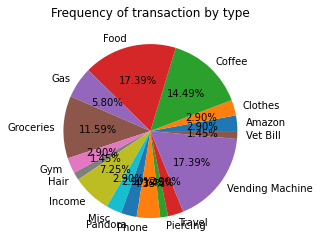

In [3]:
import matplotlib.pyplot as plt

#Visualize transaction frequency"
y_list=[]
x_list=[]
for group in grouped_by_category_checking:
    group_name=group[0]  
    #print(group_name)
    group_total=len(group[1]["Category"])
    #print(group_total)
    if group_name not in x_list:
        x_list+=[group_name]
    y_list+=[group_total]
y_ser=pd.Series(y_list)
x_ser=pd.Series(x_list)
#print(y_ser)
#print(x_ser)

plt.figure() # to create a new "current" figure
plt.pie(y_ser, labels=x_ser, autopct="%.2f%%")
plt.title("Frequency of transaction by type")
plt.show()

### Now lets do a little t testing for statistical correlation:

In [4]:
import scipy.stats as stats
#Hypothesis testing:
# On days I bought coffee did I sleep less than 6 hourss?

coffee=grouped_by_category_checking.get_group("Coffee")

coffee_dates=coffee["Date"]
merged_coffee_sleep=sleep_df.merge(coffee_dates,on="Date")
#print(merged_coffee_sleep)
merged_coffee_sleep_mean=merged_coffee_sleep["Hours Sleep"].mean()
coffee_sleep_ser=merged_coffee_sleep["Hours Sleep"]


print("Average sleep on days with coffee:",merged_coffee_sleep_mean)
average_sleep=merged_sleep_df["Hours Sleep"].mean()
sleep_ser=merged_sleep_df["Hours Sleep"]

print("Average total sleep",average_sleep)

#non_coffee_keys=['Amazon', 'Pandora', 'Income', 'Hair', 'Misc', 'Phone', 'Piercing', 'Travel', 'Gym', 'Vending Machine', 'Clothes', 'Gas', 'Food', 'Groceries', 'Vet Bill']
#print(non_coffee_keys)

merged_sleep_grouped=merged_sleep_df.groupby("Category")

#how to remove parts of the dataframe that have coffee for 2 test?

#Do a t test for 1 sample:
#1. Identify null and alternative hypothesis:
# On days I bought coffee did I sleep less than 7 hourss?
# Null Hypothesis: Average sleep (on dates that I bought coffee)>= 7
# Alternative Hypothesis: Average sleep(on dates that I bought coffee)< 7
#2 Select alpha: Level of significance 0.01
#3. Choose test statistic:
#Ours will be a 1 sample test statistic
#4. Formulate decision rule:
# For a one tailed test, alpha =0.01, if t_computed is negative, and p<0.05, we can reject our null hypothesis
t_computed,p=stats.ttest_1samp(coffee_sleep_ser,7)
print(t_computed,p)
print("Since p/2>alpha, we cannot reject our null hypothesis")


Average sleep on days with coffee: 6.45
Average total sleep 7.135714285714286
-1.2057937571490847 0.2586395425435638
Since p/2>alpha, we cannot reject our null hypothesis


### Classification Results:
#### Now, we can build a model to predict class labels based on attributes
* For this, I want to take a look at sleep, and what could cause good and bad sleep
    * In order to do this, I can convert my sleep category into a binary category (good or bad) with bad sleep being less than 7 hours
    * Then we can go through the test train split algorithm and use both a Knn and decision tree classifier
        * We can also compare the results
        * What are che challenges with classification?

### Conclusion
* A: a short summary of the dataset used
* B. The classification approach you developed, it's performance, and ideas on ways to improve performance
* C. Describe the potential impacts including ethical impacts for the stakeholders described
